In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [103]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [104]:
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [105]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,47.586476,2.704959,13.780366,7.840526,20.854692
1,52.849501,13.715793,11.554176,0.177232,18.713418
2,50.172777,2.456808,13.268982,8.533771,17.721461
3,57.349153,2.734971,8.396169,16.691473,21.742937
4,41.515593,14.090023,6.014329,18.613273,21.925371


<AxesSubplot:ylabel='Density'>

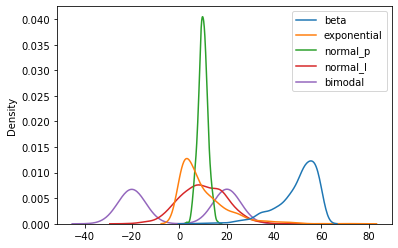

In [106]:
sns.kdeplot(data=df)

In [107]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.923969,9.943929,10.009738,10.064709,0.046961
std,8.802009,10.123001,2.010484,9.727860,20.355273
min,6.274697,0.002718,3.211746,-22.014778,-29.879181
25%,45.865794,2.670650,8.765683,3.132554,-20.143055
50%,52.450897,6.648037,9.991881,9.958067,0.249055
75%,56.447659,13.968616,11.310993,17.080459,20.133064
max,59.997857,75.727958,16.415666,48.016450,28.895057


<AxesSubplot:ylabel='Density'>

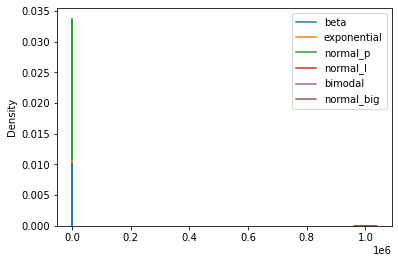

In [108]:
normal_big = np.random.normal(1000000, 10000, (1000,1)) 
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

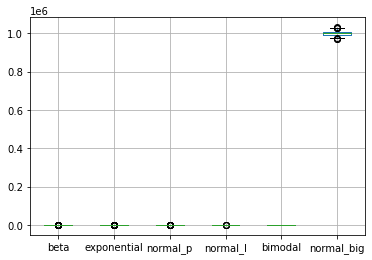

In [109]:
df.boxplot()

In [110]:
scaler = MinMaxScaler()

In [111]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [112]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.768975,0.035685,0.800415,0.426314,0.863199,0.497456
1,0.866941,0.181090,0.631815,0.316887,0.826767,0.603405
2,0.817116,0.032408,0.761686,0.436213,0.809890,0.499017
3,0.950697,0.036081,0.392643,0.552700,0.878312,0.633749
4,0.655972,0.186032,0.212254,0.580142,0.881416,0.315637


<AxesSubplot:ylabel='Density'>

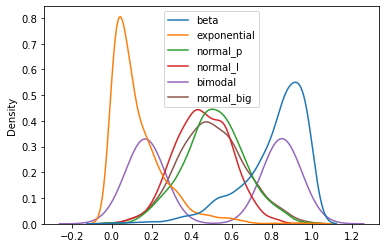

In [113]:
sns.kdeplot(data=df_s)


<AxesSubplot:>

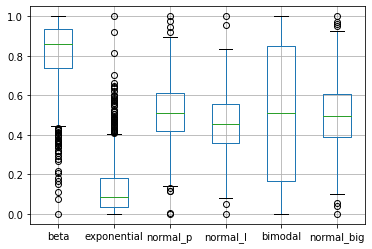

In [114]:
df_s.boxplot()


In [115]:
df_s.describe()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.812485,0.131280,0.514846,0.458074,0.509171,0.502156
std,0.163840,0.133681,0.152264,0.138907,0.346330,0.163211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.736947,0.035232,0.420628,0.359087,0.165653,0.390172
50%,0.859521,0.087756,0.513494,0.456551,0.512610,0.493453
75%,0.933917,0.184429,0.613397,0.558254,0.850921,0.607435
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df_s['beta'].min()


0.0

In [117]:
df_s['beta'].max()


1.0

In [118]:
mins = [df[col].min() for col in df.columns]
mins

[6.274697252222412,
 0.0027183967421039795,
 3.21174619138284,
 -22.014777646543216,
 -29.87918116341766,
 968787.3227279701]

In [119]:
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [120]:
maxs = [df[col].max() for col in df.columns]
maxs

[59.997856984746726,
 75.72795768712571,
 16.41566645445342,
 48.01645030694058,
 28.895056581122315,
 1030245.2414663137]

In [121]:
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]